--- 
 - 다중 선형 회귀 
   - 이제 데이터를 선언합니다. 
   - 아래 데이터는 y=2x를 가정된 상태에서 만들어진 데이터로 우리는 이미 정답이 W=2, b=0임을 알고 있는 사태입니다. 
   - 모델이 이 두 W와 b의 값을 제대로 찾아내도록 하는 것이 목표입니다. 



model : 
    Linear(in_features=1, out_features=1, bias=True) 
    torch.Size([1, 1]) tensor([[0.5153]])
    torch.Size([1]) tensor([-0.4414])

-------------------------------------------------------------------------------- 
epoch :    0/2000 
cost : 13.103541 
model : 
    Linear(in_features=1, out_features=1, bias=True)  
    torch.Size([1, 1]) tensor([[0.6715]]) 
    torch.Size([1]) tensor([-0.3732]) 

-------------------------------------------------------------------------------- 
epoch :  100/2000 
cost : 0.002791 
model : 
    Linear(in_features=1, out_features=1, bias=True)  
    torch.Size([1, 1]) tensor([[1.9388]]) 
    torch.Size([1]) tensor([0.1391]) 

-------------------------------------------------------------------------------- 
epoch :  200/2000 
cost : 0.001724 
model : 
    Linear(in_features=1, out_features=1, bias=True)  
    torch.Size([1, 1]) tensor([[1.9519]]) 
    torch.Size([1]) tensor([0.1094]) 

-------------------------------------------------------------

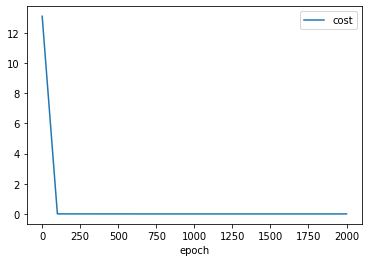

In [1]:

import myutil as mu
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

model = nn.Linear(1, 1)
mu.log("model", model)
optimizer = optim.SGD(model.parameters(), lr=0.01)
nb_epochs = 2000
mu.plt_init()

for epoch in range(nb_epochs + 1):
    hyperthesis = model(x_train)
    cost = F.mse_loss(hyperthesis, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        mu.log_epoch(epoch, nb_epochs, cost, model=model)

mu.plt_show()



--- 
 - 학습이 완료되었습니다. Cost의 값이 매우 작습니다. 
 - W와 b의 값도 최적화가 되었는지 확인해봅시다. 
 - x에 임의의 값 4를 넣어 모델이 예측하는 y의 값을 확인해보겠습니다. 
 - 사실 이 문제의 정답은 y=2x가 정답이므로 y값이 8에 가까우면 W와 b의 값이 어느정도 최적화가 된 것으로 볼 수 있습니다. 
 - 실제로 예측된 y값은 7.9989로 8에 매우 가깝습니다. 
 - 이제 학습 후의 W와 b의 값을 출력해보겠습니다. 
 - W의 값이 2에 가깝고, b의 값이 0에 가까운 것을 볼 수 있습니다. 


In [2]:

mu.log("model", model)
new_var = torch.FloatTensor([[4.0]])
pred_y = model(new_var)
mu.log("new_var.item()", new_var.item())
mu.log("pred_y.item()", pred_y.item())


model : 
    Linear(in_features=1, out_features=1, bias=True) 
    torch.Size([1, 1]) tensor([[1.9994]])
    torch.Size([1]) tensor([0.0014])

new_var.item() : 4.0
pred_y.item() : 7.99890661239624
